In [5]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(h_values):
    return np.exp(h_values) / np.sum(np.exp(h_values))

def random_(h_values):
    softmax_values = softmax(h_values)
    return np.random.choice(np.arange(len(h_values)), p=softmax_values)

def run_bandit(alpha=0.1, steps=1000, k=10, with_baseline=True):
    true_q = np.random.randn(k) + 4
    optimal_arm = np.argmax(true_q)

    average_reward = 0
    h = np.zeros(k)
    optimal_action = np.zeros(steps)

    for t in range(steps):
        a = random_(h)
        r = np.random.randn() + true_q[a]
        average_reward += (r - average_reward) / (t + 1)
        
        probs = softmax(h)
        baseline = average_reward if with_baseline else 0
            
        for i in range(k):
            if i == a:
                h[i] += alpha * (r - baseline) * (1 - probs[i])
            else:
                h[i] -= alpha * (r - baseline) * probs[i]
        
        optimal_action[t] = (a == optimal_arm)

    return optimal_action


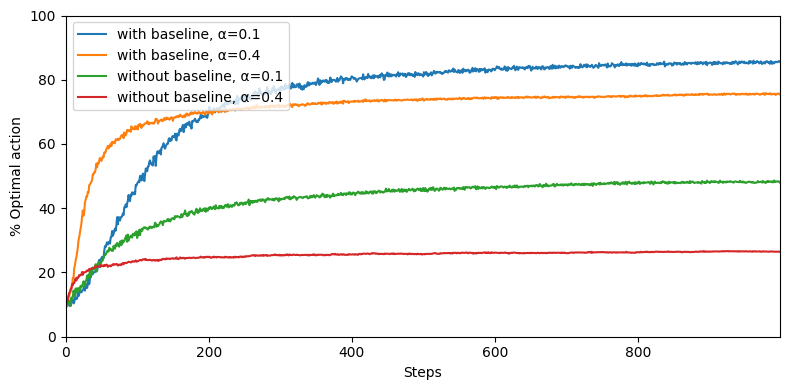

In [6]:
runs = 2000
steps = 1000
with_baseline_alpha_01 = np.zeros(steps)
with_baseline_alpha_04 = np.zeros(steps)
without_baseline_alpha_01  = np.zeros(steps)
without_baseline_alpha_04 = np.zeros(steps)

for _ in range(runs):
    with_baseline_alpha_01 += run_bandit(alpha=0.1)
    with_baseline_alpha_04 += run_bandit(alpha=0.4)
    without_baseline_alpha_01 += run_bandit(alpha=0.1, with_baseline=False)
    without_baseline_alpha_04 += run_bandit(alpha=0.4, with_baseline=False)

with_baseline_alpha_01 /= runs
with_baseline_alpha_04 /= runs
without_baseline_alpha_01 /= runs
without_baseline_alpha_04 /= runs

plt.figure(figsize=(8,4))
plt.plot(with_baseline_alpha_01 * 100, label='with baseline, α=0.1', color='C0')
plt.plot(with_baseline_alpha_04 * 100, label='with baseline, α=0.4', color='C1')
plt.plot(without_baseline_alpha_01 * 100, label='without baseline, α=0.1', color='C2')
plt.plot(without_baseline_alpha_04 * 100, label='without baseline, α=0.4', color='C3')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.ylim(0, 100)
plt.xlim(0, steps-1)
plt.legend()
plt.tight_layout()
plt.show()